In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
%matplotlib inline
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Bidirectional,Dense, LSTM, Activation, Dropout, Flatten
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import os 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_curve, auc, roc_auc_score,matthews_corrcoef
from tensorflow.keras.callbacks import Callback,EarlyStopping
import random
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score, matthews_corrcoef, roc_curve, auc
from tensorflow.keras import backend as K
import itertools
import os
import random
import tensorflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Reshape
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import utils
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.regularizers import l2
import copy
from sklearn.metrics import roc_auc_score
from Bio import SeqIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Lambda, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from numpy import array
from numpy import argmax
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from tensorflow.keras import backend as K
from tensorflow.keras.backend import expand_dims
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import roc_curve, auc, classification_report
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling2D,GlobalMaxPooling1D
from Bio import SeqIO
import random
import functools
import itertools
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Reshape, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
import copy


import pandas as pd
import numpy as np

cut_off = int(15)
alphabet = 'ARNDCQEGHILKMFPSTWYV-'

char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
test_x_51 = []
test_y_51 = []
posit_1 = 1;
negat_0 = 0;

allpos = []
allneg = []

# TRAIN DATASET -------------------------------------------------------------
#for positive sequence
def inner_1():
    #Input
    data = seq_record.seq
    data = data[cut_off:-cut_off]
    allpos.append(data)
    for char in data:
        if char not in alphabet:
            return
    integer_encoded = [char_to_int[char] for char in data]
    test_x_51.append(integer_encoded)
    test_y_51.append(posit_1)
for seq_record in SeqIO.parse("DeepPSP_81_window_Test_Positive_18553 (1).fasta", "fasta"):
    inner_1()
# for negative sequence
def inner_2():
    #Input
    data = seq_record.seq
    data = data[cut_off:-cut_off]
    allneg.append(data)
    for char in data:
        if char not in alphabet:
            return
    integer_encoded = [char_to_int[char] for char in data]
    test_x_51.append(integer_encoded)
    test_y_51.append(negat_0)
for seq_record in SeqIO.parse("DeepPSP_81_window_Test_Negative_101944 (2).fasta", "fasta"):
    inner_2()
x_test_51 = array(test_x_51)
y_test_51 = array(test_y_51)

print(x_test_51.shape,y_test_51.shape)

x_test_41 = x_test_51[:,[i for i in range(5,46)]]
x_test_33 = x_test_41[:,[i for i in range(4,37)]]
x_test_21 = x_test_33[:,[i for i in range(6,27)]]

AAindex_Test_AA_Sequence = []
for i in range(len(x_test_51)):
    integer_of_string = str(x_test_51[i])
    integer_of_string = integer_of_string.strip("[").strip("]").strip(" ")
    keras_job = integer_of_string.split()
    individual_AA_peptide = []
    for i in range(len(keras_job)):
        index_value = int(keras_job[i])
        individual_AA_peptide.append(int_to_char.get(index_value))
    individual_AA_peptide = "".join(individual_AA_peptide)
    AAindex_Test_AA_Sequence.append(individual_AA_peptide)

import pandas as pd
import numpy as np


print("Load the Prot_T5 Index datasets")

aminoacids='ARNDCQEGHILKMFPSTWYV-'

def binary_encode(Sequence_one_hot_encoding):     
    aa2v={x:y for x,y in zip(aminoacids,np.eye(21,21).tolist())}
    aa2v['X']=np.zeros(21)
    encoding=[]
    for i in range(len(Sequence_one_hot_encoding)):
        s=Sequence_one_hot_encoding[i]
        encoding.append([aa2v[x] for x in s])
    encoding=np.array(encoding)
    return encoding

Header_name = ["PID","Position","Sequence","Middle_Amino_Acid"]

col_of_feature = [i for i in range(1,1025)]

Target = ["Target"]

Header_name = Header_name + col_of_feature + Target

df_Test_Negative = pd.read_csv("Index_DeepPSP_33_window_Test_Negative.txt",header=None)
df_Test_Negative.columns = Header_name

df_Test_Positive = pd.read_csv("Index_DeepPSP_33_window_Test_Positive.txt",header=None)
df_Test_Positive.columns = Header_name

frames = [df_Test_Positive, df_Test_Negative]

total_mean_deeppsp_testing = pd.concat(frames,ignore_index = True)

df_Test_array = total_mean_deeppsp_testing.drop(["PID","Position","Sequence","Middle_Amino_Acid","Target"],axis=1)
df_Test_array = np.array(df_Test_array)

df_Test_Sequence = np.array(total_mean_deeppsp_testing["Sequence"])

dictionary_Test_Set = dict(zip(df_Test_Sequence,df_Test_array))

Test_array = []
for i in range(len(AAindex_Test_AA_Sequence)):
    AAindex_Test_AA = AAindex_Test_AA_Sequence[i][9:-9]
    sequences_of_test_sequence = AAindex_Test_AA.strip("-")
    value_of_the_sequence =dictionary_Test_Set.get(sequences_of_test_sequence)
    Test_array.append(value_of_the_sequence)

Prot_T5_Test_array = np.array(Test_array)

binaryCoding_Independent_Test = binary_encode(AAindex_Test_AA_Sequence)

y_test = y_test_51
print("Predict and Test the independent datasets")

(120476, 51) (120476,)
Load the Prot_T5 Index datasets
Predict and Test the independent datasets


In [2]:
from tensorflow import keras
EM_Prot_model = keras.models.load_model('Again_job_was_performed_stacked_generilization_model_5112305.h5')

Y_pred1_EM_Prot = EM_Prot_model.predict([x_test_51, Prot_T5_Test_array])

In [5]:
yhat = argmax(Y_pred1_EM_Prot, axis=1)
r_test_y = y_test
print("Matthews Correlation : ",matthews_corrcoef(r_test_y, yhat))
print("Confusion Matrix : \n",confusion_matrix(r_test_y, yhat))
print('Test accuracy:', accuracy_score( r_test_y, yhat))
sp_1, sn_1 = confusion_matrix(r_test_y, yhat)
sp_2 = sp_1[0]/(sp_1[0]+sp_1[1])
sn_2 = sn_1[1]/(sn_1[0]+sn_1[1])
print("Specificity = ",sp_2, " Sensitivity = ",sn_2)

Matthews Correlation :  0.39059338038647223
Confusion Matrix : 
 [[82275 19650]
 [ 6099 12452]]
Test accuracy: 0.7862727846210034
Specificity =  0.8072111846946284  Sensitivity =  0.6712306614198695


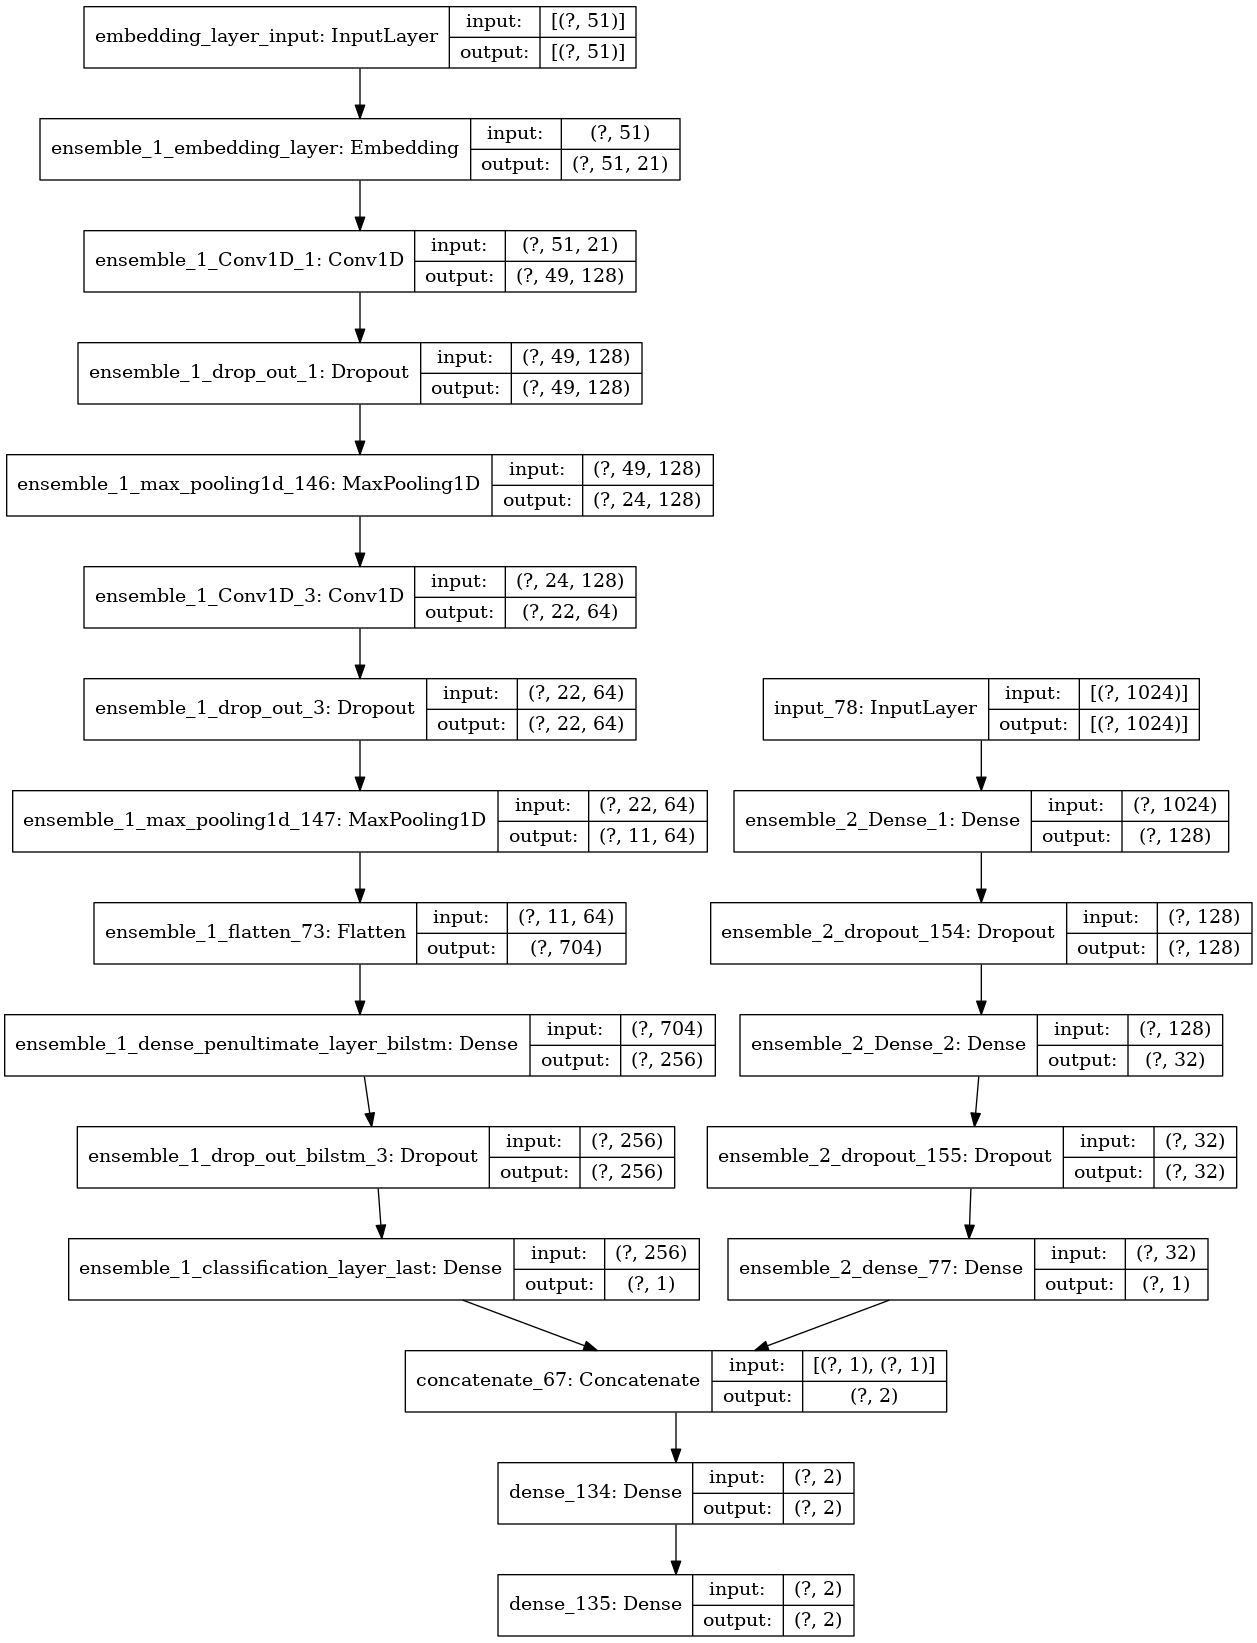

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(EM_Prot_model,show_shapes = True, to_file='Embdding+ProtT5.png')

In [7]:
EM_Prot_model.summary()

Model: "functional_135"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_layer_input (InputLay [(None, 51)]         0                                            
__________________________________________________________________________________________________
ensemble_1_embedding_layer (Emb (None, 51, 21)       483         embedding_layer_input[0][0]      
__________________________________________________________________________________________________
ensemble_1_Conv1D_1 (Conv1D)    (None, 49, 128)      8192        ensemble_1_embedding_layer[0][0] 
__________________________________________________________________________________________________
ensemble_1_drop_out_1 (Dropout) (None, 49, 128)      0           ensemble_1_Conv1D_1[0][0]        
_____________________________________________________________________________________

In [8]:
CM = confusion_matrix(r_test_y, yhat)

In [9]:
CM

array([[82275, 19650],
       [ 6099, 12452]])

In [13]:
TP = CM[1][1]
TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
Recall=  (TP/(TP+FN))*100
FSCORE = 2*((Precision*Recall)/(Precision+Recall))
Precision=  TP/(TP+FP)*100

In [14]:
Precision

38.78886050713351

In [15]:
Recall

67.12306614198695

In [16]:
FSCORE

49.165893431780944

# Thank You